# Classificação: Otimizando modelos de machine learning

In [1]:
! pip install pandas==1.5.3 \
              scikit-learn==1.2.2 \
              matplotlib==3.7.1 \
              scikit-optimize==0.9.0 \
              plotly==5.15.0 \
              numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-lea

In [2]:
import pandas as pd

CSV_URL = 'https://3070-classificacao-otimizacao.s3.us-east-2.amazonaws.com/dados_inadimplencia.csv'

df = pd.read_csv(CSV_URL)

df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [4]:
df['inadimplente'].value_counts(normalize=True) * 100

0    67.649883
1    32.350117
Name: inadimplente, dtype: float64

In [5]:
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

display(X.head())
display(y.head())

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0


0    1
1    0
2    0
3    0
4    1
Name: inadimplente, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

SEED = 7

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.33,
                                                   stratify=y,
                                                   random_state=SEED)

## Construindo os modelos

### DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(max_depth=3,
                                   random_state=SEED)

model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [8]:
from sklearn.metrics import recall_score

recall_dtc = recall_score(y_test, model_dtc.predict(X_test))

print(f'DecisionTreeClassifier Recall: {recall_dtc:.2f}')

DecisionTreeClassifier Recall: 0.16


### LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logreg_pipeline = make_pipeline(StandardScaler(),
                                LogisticRegression(random_state=SEED))
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=7))])

In [10]:
recall_logreg = recall_score(y_test, 
                            logreg_pipeline.predict(X_test))

print(f'Logistic regression recall: {recall_logreg:.2f}')

Logistic regression recall: 0.24


## GridSearchCV

### DecisionTreeClassifier

In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid_dtc = dict(criterion=['gini', 'entropy'],
                      max_depth=np.linspace(6, 12, 4, dtype=int),
                      min_samples_split=np.linspace(5, 20, 4, dtype=int),
                      min_samples_leaf=np.linspace(5, 20, 4, dtype=int),
                      max_features=['sqrt', 'log2'],
                      splitter=['best', 'random']) 

cv = StratifiedKFold(shuffle=True,
                     random_state=SEED)

model_dtc_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=SEED),
                              param_grid=param_grid_dtc,
                              scoring='recall',
                              cv=cv)

model_dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [12]:
model_dtc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}

In [15]:
df_dtc_grid = pd.DataFrame(model_dtc_grid.cv_results_)
df_dtc_grid.loc[[model_dtc_grid.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.006921,0.00031,0.001151,0.000012,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.295886,0.223101,0.275316,0.294304,0.275316,0.272785,0.026374,1


Text(0, 0.5, 'mean_test_score')

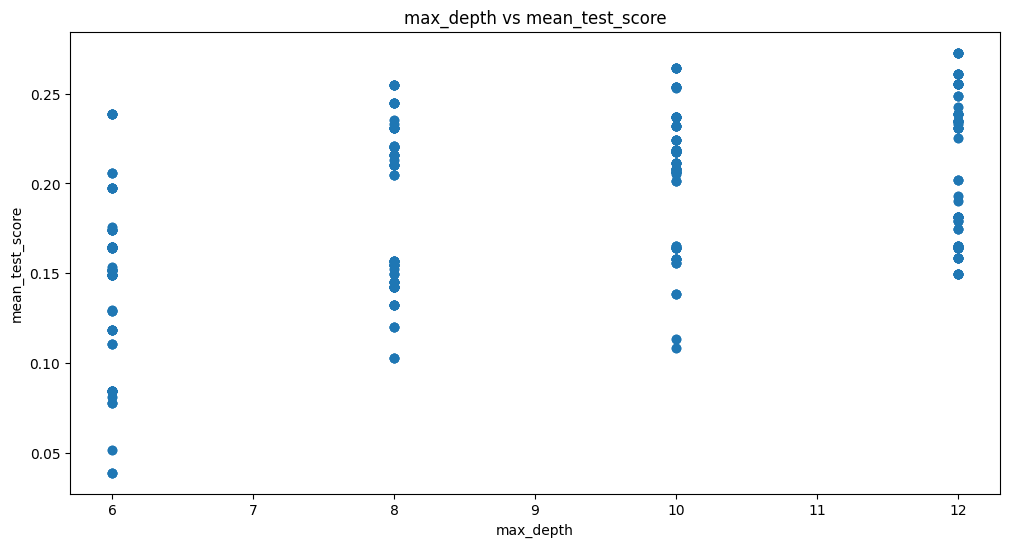

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.scatter(df_dtc_grid['param_max_depth'],
                 df_dtc_grid['mean_test_score'])

plt.title('max_depth vs mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('mean_test_score')

Text(0, 0.5, 'mean_test_score')

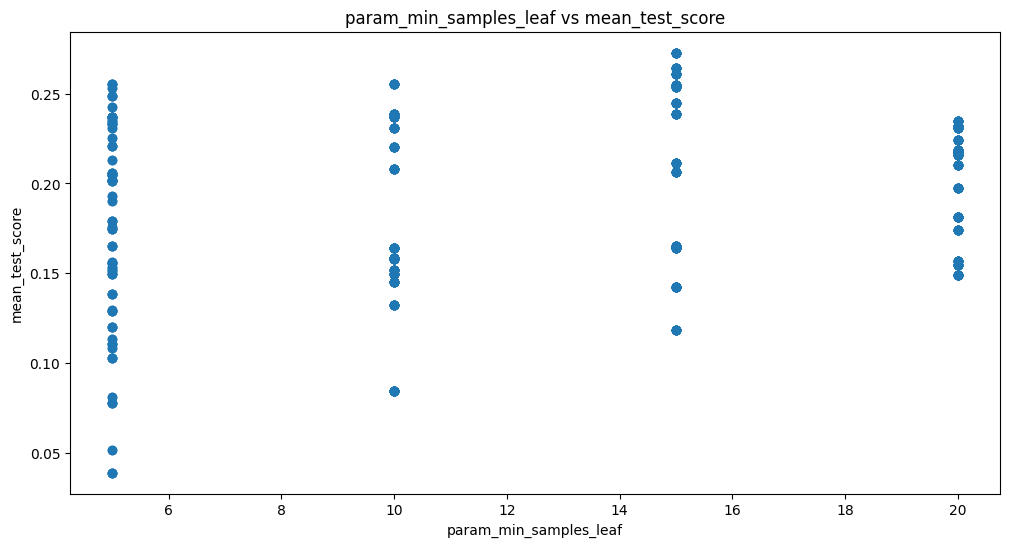

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.scatter(df_dtc_grid['param_min_samples_leaf'],
                 df_dtc_grid['mean_test_score'])

plt.title('param_min_samples_leaf vs mean_test_score')
plt.xlabel('param_min_samples_leaf')
plt.ylabel('mean_test_score')

### LogisticRegression

In [50]:
param_grid_log_reg_def = dict(max_iter=np.linspace(100, 300, 5, dtype=int),
                              C=[10 ** -i for i in range(-1, 4)])
param_grid_logreg = [
    dict(solver=['newton-cg', 'lbfgs'],
         penalty=['l2'],
         **param_grid_log_reg_def),
    dict(solver=['liblinear'],
         penalty=['l1', 'l2'],
         **param_grid_log_reg_def)
]

param_grid_logreg = [{f'logisticregression__{key}': value for key, value in param_grid.items()} 
                                                          for param_grid in param_grid_logreg]

model_logreg_grid = GridSearchCV(estimator=make_pipeline(StandardScaler(), 
                                                         LogisticRegression(random_state=SEED)),
                                 param_grid=param_grid_logreg,
                                 scoring='recall',
                                 cv=cv)

model_logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=7))]),
             param_grid=[{'logisticregression__C': [10, 1, 0.1, 0.01, 0.001],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [10, 1, 0.1, 0.01, 0.001],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [52]:
model_logreg_grid.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [53]:
df_logreg_grid = pd.DataFrame(model_logreg_grid.cv_results_)
df_logreg_grid.loc[[model_logreg_grid.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
91,0.007128,0.000023,0.002271,0.000041,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.248418,0.268987,0.246835,0.238924,0.262658,0.253165,0.011008,1


Text(0, 0.5, 'mean_test_score')

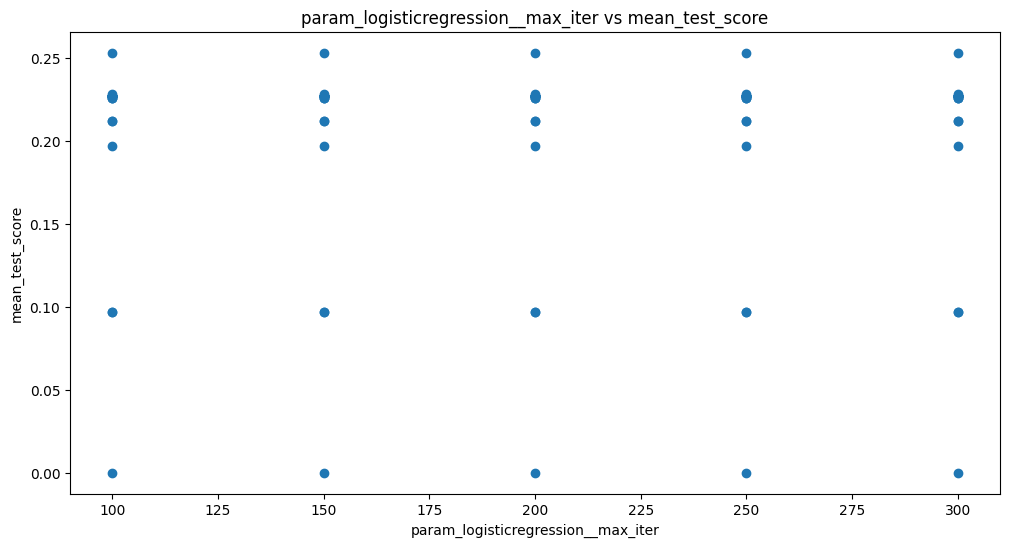

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.scatter(df_logreg_grid['param_logisticregression__max_iter'],
                 df_logreg_grid['mean_test_score'])

plt.title('param_logisticregression__max_iter vs mean_test_score')
plt.xlabel('param_logisticregression__max_iter')
plt.ylabel('mean_test_score')

## Nested Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

inner_cv = StratifiedKFold(shuffle=True, random_state=SEED)
outer_cv = StratifiedKFold(n_splits=3, 
                           shuffle=True, 
                           random_state=SEED)

### DecisionTreeClassifier

In [63]:
model_dtc_grid_nested_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=SEED),
                                        param_grid=param_grid_dtc,
                                        scoring='recall',
                                        cv=inner_cv)

model_dtc_grid_nested_cv_scores = cross_val_score(model_dtc_grid_nested_cv,
                                                  X_train,
                                                  y_train,
                                                  cv=outer_cv)

print(f'Outer CV: {model_dtc_grid_nested_cv_scores} '
      f'(Mean: {model_dtc_grid_nested_cv_scores.mean():.2f})')

Outer CV: [0.21842355 0.26755218 0.28395062] (Mean: 0.26)


### LogisticRegression

In [64]:
model_logreg_grid_nested_cv = GridSearchCV(estimator=make_pipeline(StandardScaler(), 
                                                         LogisticRegression(random_state=SEED)),
                                           param_grid=param_grid_logreg,
                                           scoring='recall',
                                           cv=inner_cv)

model_logreg_grid_nested_cv_scores = cross_val_score(model_logreg_grid_nested_cv,
                                                     X_train,
                                                     y_train,
                                                     cv=outer_cv)

print(f'Outer CV: {model_logreg_grid_nested_cv_scores} '
      f'(Mean: {model_logreg_grid_nested_cv_scores.mean():.2f})')

Outer CV: [0.2668566  0.25901328 0.25071225] (Mean: 0.26)


## RandomizedSearchCV

### DecisionTreeClassifier

In [67]:
from sklearn.model_selection import RandomizedSearchCV

model_dtc_rand_nested_cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=SEED),
                                              param_distributions=param_grid_dtc,
                                              n_iter=100,
                                              scoring='recall',
                                              cv=inner_cv,
                                              random_state=SEED)

model_dtc_rand_nested_cv_scores = cross_val_score(model_dtc_rand_nested_cv,
                                                  X_train,
                                                  y_train,
                                                  cv=outer_cv)

print(f'Outer CV: {model_dtc_rand_nested_cv_scores} '
      f'(Mean: {model_dtc_rand_nested_cv_scores.mean():.2f})')

Outer CV: [0.20987654 0.26755218 0.28395062] (Mean: 0.25)


In [68]:
model_dtc_rand_nested_cv.fit(X_train, y_train)
model_dtc_rand_nested_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'gini'}

### LogisticRegression

In [69]:
model_logreg_rand_nested_cv = RandomizedSearchCV(estimator=make_pipeline(StandardScaler(),
                                                        LogisticRegression(random_state=SEED)),
                                                 param_distributions=param_grid_logreg,
                                                 n_iter=100,
                                                 scoring='recall',
                                                 cv=inner_cv,
                                                 random_state=SEED)

model_logreg_rand_nested_cv_scores = cross_val_score(model_logreg_rand_nested_cv,
                                                     X_train,
                                                     y_train,
                                                     cv=outer_cv)

print(f'Outer CV: {model_logreg_rand_nested_cv_scores} '
      f'(Mean: {model_logreg_rand_nested_cv_scores.mean():.2f})')

Outer CV: [0.2668566  0.25901328 0.25071225] (Mean: 0.26)


In [70]:
model_logreg_rand_nested_cv.fit(X_train, y_train)
model_logreg_rand_nested_cv.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 100,
 'logisticregression__C': 0.001}

## Bayesian Optimization

### DecisionTreeClassifier

In [74]:
from skopt.space import Real
from skopt.space import Integer
from skopt.space import Categorical
from skopt import BayesSearchCV

space_dtc = dict(criterion=Categorical(['gini', 'entropy']),
                 max_depth=Integer(6, 12),
                 min_samples_split=Integer(5, 20),
                 min_samples_leaf=Integer(5, 20),
                 max_features=Categorical(['sqrt', 'log2']),
                 splitter=Categorical(['best', 'random']))

model_dtc_optbay = BayesSearchCV(estimator=DecisionTreeClassifier(random_state=SEED),
                                  search_spaces=space_dtc,
                                  n_iter=50,
                                  scoring='recall',
                                  cv=inner_cv,
                                  random_state=SEED)

model_dtc_optbay_scores = cross_val_score(model_dtc_optbay,
                                          X_train, 
                                          y_train,
                                          cv=outer_cv)

print(f'Outer CV: {model_dtc_optbay_scores} '
      f'(Mean: {model_dtc_optbay_scores.mean():.2f})')

/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site

Outer CV: [0.20702754 0.27893738 0.24596391] (Mean: 0.24)


In [75]:
model_dtc_optbay.fit(X_train, y_train)
model_dtc_optbay.best_params_

/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


OrderedDict([('criterion', 'gini'),
             ('max_depth', 12),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 5),
             ('min_samples_split', 12),
             ('splitter', 'best')])

### LogisitcRegression

In [77]:
space_logreg_def = dict(max_iter=Integer(100, 300),
                        C=Categorical([10 ** -i for i in range(-1, 4)]))
space_logreg = [
    dict(solver=Categorical(['newton-cg', 'lbfgs']),
         penalty=Categorical(['l2']),
         **space_logreg_def),
    dict(solver=Categorical(['liblinear']),
         penalty=Categorical(['l1', 'l2']),
         **space_logreg_def)
]

space_logreg = [{f'logisticregression__{key}': value for key, value in param_grid.items()} 
                                                     for param_grid in space_logreg]

model_logreg_optbay = BayesSearchCV(estimator=make_pipeline(StandardScaler(),
                                                            LogisticRegression(random_state=SEED)),
                                    search_spaces=space_logreg,
                                    n_iter=50,
                                    scoring='recall',
                                    cv=inner_cv,
                                    random_state=SEED)

model_logreg_optbay_scores = cross_val_score(model_logreg_optbay,
                                             X_train, 
                                             y_train,
                                             cv=outer_cv)

print(f'Outer CV: {model_logreg_optbay_scores} '
      f'(Mean: {model_logreg_optbay_scores.mean():.2f})')

/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site

Outer CV: [0.2668566  0.25901328 0.25071225] (Mean: 0.26)


In [78]:
model_logreg_optbay.fit(X_train, y_train)
model_logreg_optbay.best_params_

/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.11/site

OrderedDict([('logisticregression__C', 0.001),
             ('logisticregression__max_iter', 255),
             ('logisticregression__penalty', 'l2'),
             ('logisticregression__solver', 'liblinear')])